# EcomBank Fraud Detection - Task 1: Data Analysis and Preprocessing



This notebook focus on the preprocessing steps for the fraud detection datasets, including handling missing values, cleaning data, performing exploratory data analysis (EDA), feature engineering, and preparing the data for model building.



## Loading Libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

ModuleNotFoundError: No module named 'sklearn'

# Load the datasets

In [6]:

fraud_data = pd.read_csv('../data/Fraud_Data.csv')
ip_data = pd.read_csv('../data/IpAddress_to_Country.csv')

In [3]:
# Display the first few rows of each dataset
fraud_data.head(), ip_country_data.head()


(   user_id          signup_time        purchase_time  purchase_value  \
 0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
 1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
 2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
 3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
 4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   
 
        device_id source browser sex  age    ip_address  class  
 0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0  
 1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  
 2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  
 3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0  
 4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0  ,
    lower_bound_ip_address  upper_bound_ip_address    country
 0              16777216.0                16777471  Australia
 1              16777472.0                167

In [13]:
fraud_data_info = fraud_data.info()
ip_data_info = ip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower

## Handling Missing Values

In [12]:
# Check for missing values in the fraud data
missing_fraud_data = fraud_data.isnull().sum()

# Check for missing values in the IP data
missing_ip_data = ip_data.isnull().sum()

# Display the missing values summary
missing_fraud_data, missing_ip_data

(user_id           0
 signup_time       0
 purchase_time     0
 purchase_value    0
 device_id         0
 source            0
 browser           0
 sex               0
 age               0
 ip_address        0
 class             0
 dtype: int64,
 lower_bound_ip_address    0
 upper_bound_ip_address    0
 country                   0
 dtype: int64)

## Data Cleaning

Duplicate Handeling

In [14]:
# Check for duplicates in fraud data
fraud_duplicates = fraud_data.duplicated().sum()

# Check for duplicates in IP data
ip_duplicates = ip_data.duplicated().sum()

# Display duplicate counts
fraud_duplicates, ip_duplicates

(np.int64(0), np.int64(0))

Data Type Corrections

In [15]:
# Convert signup_time and purchase_time to datetime format
fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'])
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])

# Convert ip_address to integer format
fraud_data['ip_address'] = fraud_data['ip_address'].astype(int)

# Verify the updated data types
fraud_data.dtypes

user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address                 int64
class                      int64
dtype: object

Univariate Analysis: Visualize the distribution of fraudulent (class = 1) vs. non-fraudulent (class = 0) transactions.

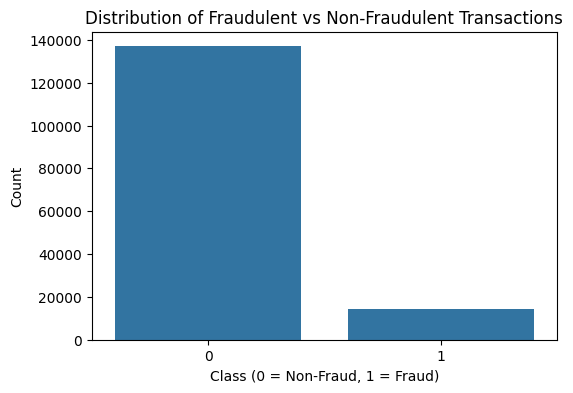

In [16]:
# Univariate Analysis: Fraudulent vs Non-Fraudulent Transactions
plt.figure(figsize=(6, 4))
sns.countplot(data=fraud_data, x='class')
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.show()

Bivariate Analysis: Explore relationships between features such as purchase_value and class.

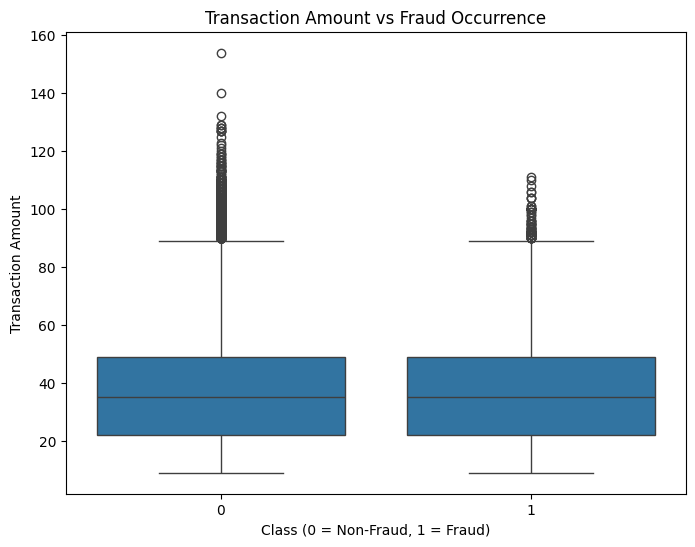

In [17]:
# Bivariate Analysis: Transaction Amount vs Fraud Occurrence
plt.figure(figsize=(8, 6))
sns.boxplot(x='class', y='purchase_value', data=fraud_data)
plt.title('Transaction Amount vs Fraud Occurrence')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Transaction Amount')
plt.show()

## Geolocation Analysis

Convert IP addresses to integer format and merge with the country mapping dataset.

In [18]:
# Merge Fraud_Data with IP Address to Country Mapping
fraud_data_merged = pd.merge(fraud_data, ip_data, how='left', left_on='ip_address', right_on='lower_bound_ip_address')

# Display the first few rows after merging
fraud_data_merged.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,NaN,NaN,NaN
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,NaN,NaN,NaN
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,NaN,NaN,NaN
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443,0,NaN,NaN,NaN
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,NaN,NaN,NaN


Transaction Frequency and Velocity

In [19]:
# Feature Engineering: Transaction Frequency and Velocity
fraud_data['transaction_frequency'] = fraud_data.groupby('user_id')['user_id'].transform('count')
fraud_data['transaction_velocity'] = fraud_data['purchase_time'].diff().dt.total_seconds().fillna(0)


Time-Based Features

In [20]:
# Feature Engineering: Time-Based Features
fraud_data['hour_of_day'] = fraud_data['purchase_time'].dt.hour
fraud_data['day_of_week'] = fraud_data['purchase_time'].dt.weekday


## Normalization and Scaling

Standardize numerical features.

In [ ]:
# Normalize and Scale the transaction amounts
scaler = StandardScaler()
fraud_data['purchase_value_scaled'] = scaler.fit_transform(fraud_data[['purchase_value']])

## Categorical Encoding

Perform one-hot encoding on categorical variables such as device_id and browser.

In [ ]:
# Categorical Encoding: One-Hot Encoding for Device and Browser
fraud_data_encoded = pd.get_dummies(fraud_data, columns=['device_id', 'browser'], drop_first=True)

# Display the first few rows after encoding
fraud_data_encoded.head()
